<a href="https://colab.research.google.com/github/Rushi8240/Rushi/blob/main/Copy_of_student_dropout_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression,Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay, RocCurveDisplay

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
data = pd.read_excel("student_data_dropout.xlsx")

Saving student_data_dropout.xlsx to student_data_dropout (3).xlsx


In [ ]:
data.head()

,Unnamed: 0,Country,Student Name,Student ID,Gender,Physics,Chemistry,Maths,English,Total Marks,Dropout,Mobile_Usage_Hours,Study_Hours,Attendance_Percentage
0,0,USA,Ali Lee,S00001,Male,43,76,52,52,223,Yes,4.2,1.6,55.9
1,1,Australia,Ali Wang,S00002,Female,42,52,47,48,189,No,1.1,3.6,74.1
2,2,UK,Sara Johnson,S00003,Female,99,69,86,95,349,Yes,2.4,1.9,56.5
3,3,France,David Davis,S00004,Female,48,85,37,59,229,No,2.1,2.2,80.2
4,4,India,Amit Smith,S00005,Male,57,78,90,68,293,No,4.7,1.2,91.4


In [ ]:
data.shape

(2000, 14)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2000 non-null   int64  
 1   Country                2000 non-null   object 
 2   Student Name           2000 non-null   object 
 3   Student ID             2000 non-null   object 
 4   Gender                 2000 non-null   object 
 5   Physics                2000 non-null   int64  
 6   Chemistry              2000 non-null   int64  
 7   Maths                  2000 non-null   int64  
 8   English                2000 non-null   int64  
 9   Total Marks            2000 non-null   int64  
 10  Dropout                2000 non-null   object 
 11  Mobile_Usage_Hours     2000 non-null   float64
 12  Study_Hours            2000 non-null   float64
 13  Attendance_Percentage  2000 non-null   float64
dtypes: float64(3), int64(6), object(5)
memory usage: 218.9+ 

In [ ]:
data.isnull().sum()

,0
Unnamed: 0,0
Country,0
Student Name,0
Student ID,0
Gender,0
Physics,0
Chemistry,0
Maths,0
English,0
Total Marks,0


In [ ]:
data.columns

Index(['Unnamed: 0', 'Country', 'Student Name', 'Student ID', 'Gender',
       'Physics', 'Chemistry', 'Maths', 'English', 'Total Marks', 'Dropout',
       'Mobile_Usage_Hours', 'Study_Hours', 'Attendance_Percentage'],
      dtype='object')

In [ ]:
data.size

28000

In [ ]:
data.describe()

,Unnamed: 0,Physics,Chemistry,Maths,English,Total Marks,Mobile_Usage_Hours,Study_Hours,Attendance_Percentage
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,68.659000,67.484500,67.243000,67.228000,270.614500,3.528100,3.003950,74.804850
std,577.494589,19.151556,19.482416,18.999828,18.983235,38.277454,1.429004,1.154069,14.295102
min,0.000000,35.000000,35.000000,35.000000,35.000000,163.000000,1.000000,1.000000,50.000000
25%,499.750000,52.000000,51.000000,51.000000,51.000000,244.000000,2.300000,2.000000,62.650000
50%,999.500000,69.000000,67.000000,67.000000,67.000000,270.000000,3.600000,3.000000,74.600000
75%,1499.250000,85.000000,85.000000,83.250000,84.000000,298.000000,4.725000,4.000000,86.800000
max,1999.000000,100.000000,100.000000,100.000000,100.000000,391.000000,6.000000,5.000000,99.900000


In [ ]:
data['Dropout'].value_counts()

,count
Dropout,
No,1895
Yes,105


# **Dropout Distribution percentage**

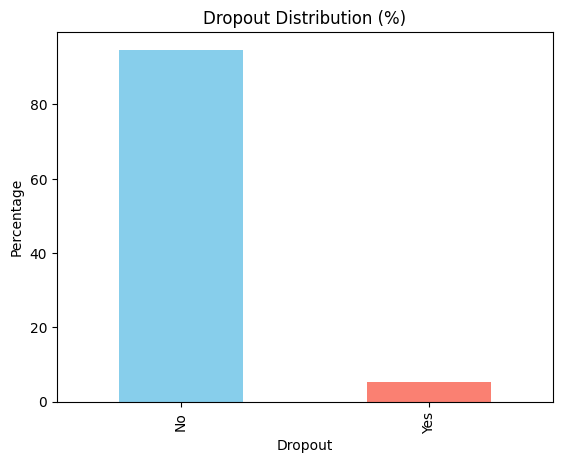

In [ ]:
dropout_percent = data['Dropout'].value_counts(normalize=True) * 100
dropout_percent.plot(kind='bar', color=['skyblue', 'salmon'])
plt.ylabel("Percentage")
plt.title("Dropout Distribution (%)")
plt.show()


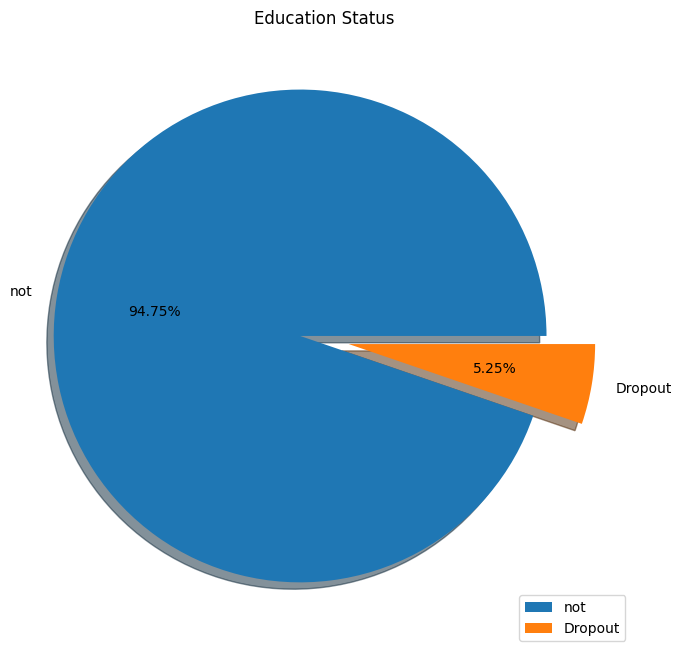

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Education Status")
plt.pie(data['Dropout'].value_counts(), labels = ['not','Dropout'], explode = (0.1, 0.1), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

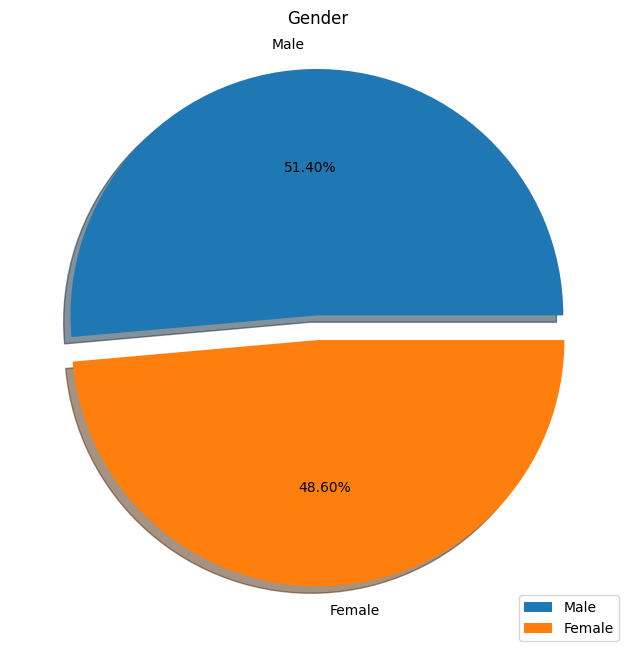

In [ ]:
plt.figure(figsize=(8, 8))
plt.title("Gender")
plt.pie(data['Gender'].value_counts(), labels = ['Male', 'Female'], explode = (0.1, 0.0), autopct='%1.2f%%', shadow = True)
plt.legend( loc = 'lower right')

# **Dropout Distribution by Country**

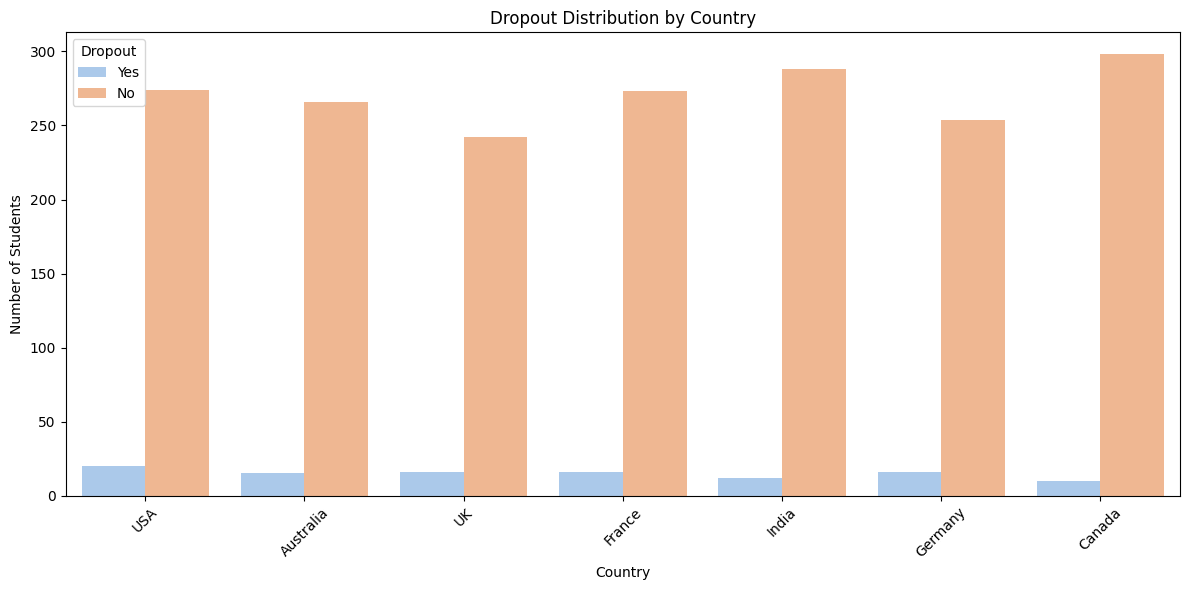

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='Country', hue='Dropout', palette='pastel')
plt.title("Dropout Distribution by Country")
plt.xlabel("Country")
plt.ylabel("Number of Students")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Dropout Distribution by Gender**

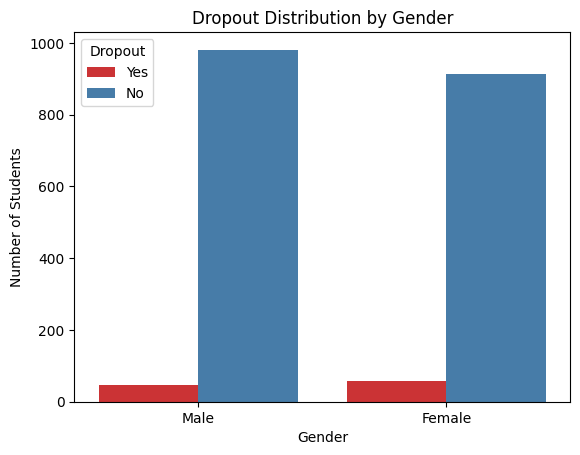

In [ ]:
sns.countplot(data=data, x='Gender', hue='Dropout', palette='Set1')
plt.title("Dropout Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Students")
plt.show()


# **HEAT MAP**

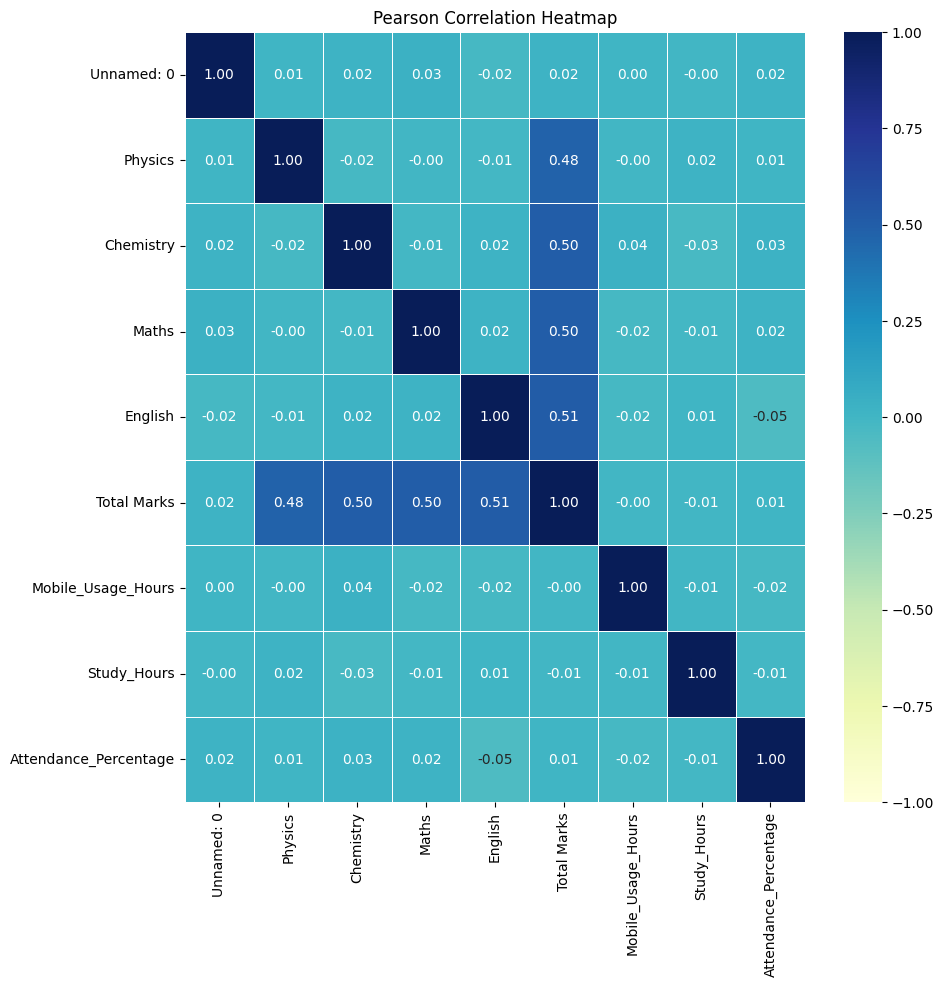

In [ ]:
numeric_data = data.select_dtypes(include=['int64', 'float64'])
corr_matrix = numeric_data.corr(method="pearson")

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f',
            cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("Pearson Correlation Heatmap")
plt.show()


In [ ]:
data.drop(data[data['Dropout'] == 1].index, inplace = True)
data

,Unnamed: 0,Country,Student Name,Student ID,Gender,Physics,Chemistry,Maths,English,Total Marks,Dropout,Mobile_Usage_Hours,Study_Hours,Attendance_Percentage
0,0,USA,Ali Lee,S00001,Male,43,76,52,52,223,Yes,4.2,1.6,55.9
1,1,Australia,Ali Wang,S00002,Female,42,52,47,48,189,No,1.1,3.6,74.1
2,2,UK,Sara Johnson,S00003,Female,99,69,86,95,349,Yes,2.4,1.9,56.5
3,3,France,David Davis,S00004,Female,48,85,37,59,229,No,2.1,2.2,80.2
4,4,India,Amit Smith,S00005,Male,57,78,90,68,293,No,4.7,1.2,91.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,France,Maria Garcia,S01996,Female,45,82,47,86,260,No,2.6,2.9,66.0
1996,1996,Germany,Ali Davis,S01997,Female,60,54,37,73,224,No,4.0,3.5,93.9
1997,1997,UK,Chen Johnson,S01998,Male,59,93,77,93,322,Yes,4.4,1.2,56.8
1998,1998,Germany,Chen Kumar,S01999,Male,98,49,41,100,288,No,2.6,4.1,58.2


In [ ]:
data['Dropout_numeric'] = data['Dropout'].apply(lambda x: 1 if x==0 else 0)
data

,Unnamed: 0,Country,Student Name,Student ID,Gender,Physics,Chemistry,Maths,English,Total Marks,Dropout,Mobile_Usage_Hours,Study_Hours,Attendance_Percentage,Dropout_numeric
0,0,USA,Ali Lee,S00001,Male,43,76,52,52,223,Yes,4.2,1.6,55.9,0
1,1,Australia,Ali Wang,S00002,Female,42,52,47,48,189,No,1.1,3.6,74.1,0
2,2,UK,Sara Johnson,S00003,Female,99,69,86,95,349,Yes,2.4,1.9,56.5,0
3,3,France,David Davis,S00004,Female,48,85,37,59,229,No,2.1,2.2,80.2,0
4,4,India,Amit Smith,S00005,Male,57,78,90,68,293,No,4.7,1.2,91.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1995,France,Maria Garcia,S01996,Female,45,82,47,86,260,No,2.6,2.9,66.0,0
1996,1996,Germany,Ali Davis,S01997,Female,60,54,37,73,224,No,4.0,3.5,93.9,0
1997,1997,UK,Chen Johnson,S01998,Male,59,93,77,93,322,Yes,4.4,1.2,56.8,0
1998,1998,Germany,Chen Kumar,S01999,Male,98,49,41,100,288,No,2.6,4.1,58.2,0


In [ ]:
numeric_cols = ['Physics', 'Chemistry', 'Maths', 'English', 'Total Marks']
x = data[numeric_cols].values

x_scaled = StandardScaler().fit_transform(x)

print(x_scaled)


[[-1.34012175  0.43719576 -0.80247108 -0.80238214 -1.2442418 ]
 [-1.39234988 -0.79499239 -1.06569718 -1.01314708 -2.1327153 ]
 [ 1.58465388  0.07780755  0.98746638  1.463341    2.04833645]
 ...
 [-0.50447157  1.30999569  0.51365941  1.35795853  1.34278396]
 [ 1.53242575 -0.9490159  -1.3815685   1.72679718  0.45431047]
 [ 0.90568811 -0.69231004 -0.32866411 -1.59275068 -0.8522682 ]]


In [ ]:
y = data['Dropout'].values
y

array(['Yes', 'No', 'Yes', ..., 'Yes', 'No', 'No'], dtype=object)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_pred, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_pred, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_pred))
    print("F1 Score : ", f1_score(y_test, y_pred, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_pred))
    print("**"*27+"\n")

    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Non-Dropout', 'Dropout'])
    cm.plot()

# **LOGISTIC REGRESSION**

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = model_lr.predict(x_test)

Precision :  0.9475
Recall :  0.9475
Accuracy :  0.9475
F1 Score :  0.9475

 [[379   0]
 [ 21   0]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       379
         Yes       0.00      0.00      0.00        21

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400

******************************************************



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


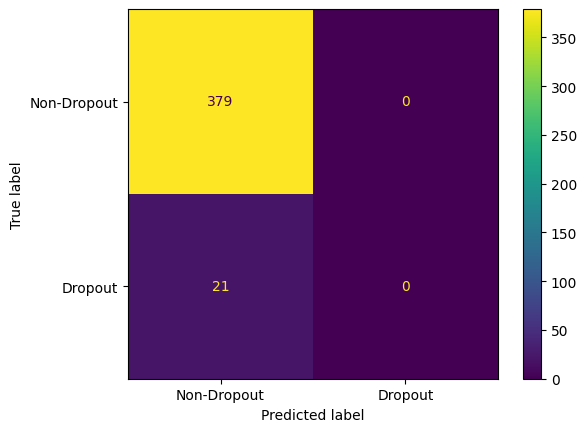

In [ ]:
perform(y_pred_lr)

# **RANDOM FOREST**

In [ ]:
model_rf = RandomForestClassifier(n_estimators=500,criterion='entropy')
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [ ]:
y_pred_rf = model_rf.predict(x_test)

Precision :  0.9475
Recall :  0.9475
Accuracy :  0.9475
F1 Score :  0.9475

 [[379   0]
 [ 21   0]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       379
         Yes       0.00      0.00      0.00        21

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400

******************************************************



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


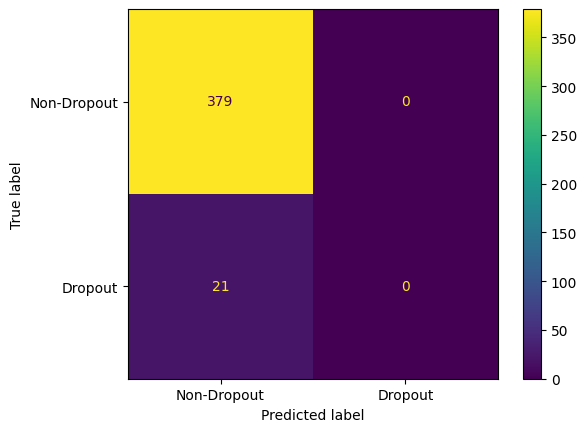

In [ ]:
perform(y_pred_rf)

# **SUPPORT VECTOR CLASSIFIER**

In [ ]:
model_svc = SVC(C=0.1,kernel='linear')
model_svc.fit(x_train, y_train)

SVC(C=0.1, kernel='linear')

In [ ]:
y_pred_svc = model_svc.predict(x_test)

Precision :  0.9475
Recall :  0.9475
Accuracy :  0.9475
F1 Score :  0.9475

 [[379   0]
 [ 21   0]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       379
         Yes       0.00      0.00      0.00        21

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400

******************************************************



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


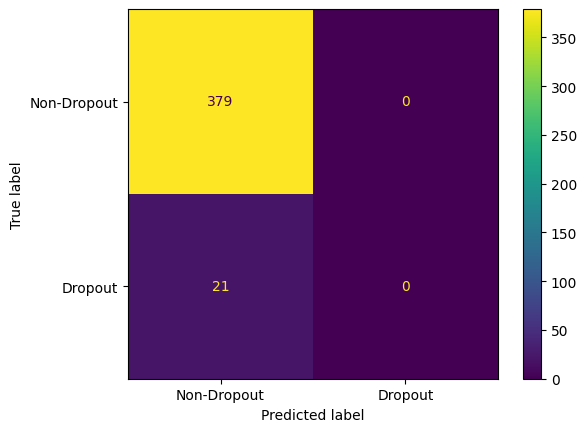

In [ ]:
perform(y_pred_svc)

# **PERCEPTON**

In [ ]:
model_mlp = Perceptron(alpha=0.001,l1_ratio=0.5,max_iter=100)
model_mlp.fit(x_train, y_train)

Perceptron(alpha=0.001, l1_ratio=0.5, max_iter=100)

In [ ]:
y_pred_mlp = model_mlp.predict(x_test)

Precision :  0.9475
Recall :  0.9475
Accuracy :  0.9475
F1 Score :  0.9475

 [[379   0]
 [ 21   0]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

          No       0.95      1.00      0.97       379
         Yes       0.00      0.00      0.00        21

    accuracy                           0.95       400
   macro avg       0.47      0.50      0.49       400
weighted avg       0.90      0.95      0.92       400

******************************************************



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


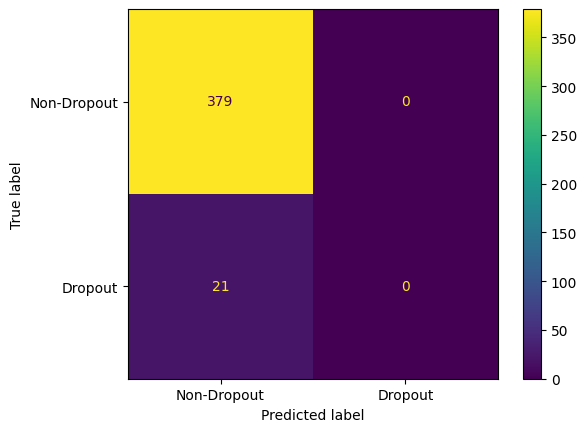

In [ ]:
perform(y_pred_mlp)

# **COMPARISON**

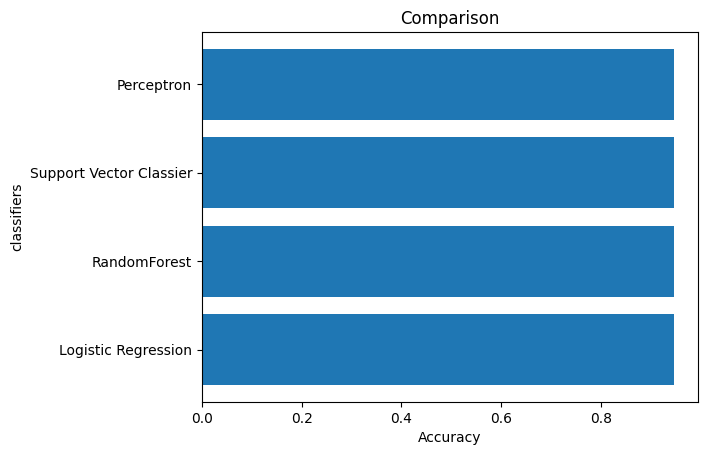

In [ ]:
pred=[y_pred_lr,y_pred_rf,y_pred_svc,y_pred_mlp]
acc=[]
classifiers=["Logistic Regression","RandomForest","Support Vector Classier","Perceptron"]
for i in pred:
    temp=accuracy_score(y_test, i)
    acc.append(temp)

plt.barh(classifiers, acc)

plt.ylabel('classifiers')
plt.xlabel('Accuracy')
plt.title('Comparison')
plt.show()
